In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
# load shape space
with open(r'D:/Dropbox/CavityDesignHub/MuCol_Study/Cavities/cavity_data_mid_end_cells.json') as f:
    shape_space = json.load(f)
pp.pprint(shape_space)

{   'C3795_1300MHz': {   'BP': 'both',
                         'FREQ': 1300,
                         'IC': [   38.36,
                                   40.78,
                                   18.63,
                                   14.25,
                                   44.4,
                                   57.6521,
                                   105.56,
                                   113.76249257990644],
                         'OC': [   38.59,
                                   35.48,
                                   10.61,
                                   7.4,
                                   49.33,
                                   57.83,
                                   105.56,
                                   107.9],
                         'OC_R': [   38.59,
                                     35.48,
                                     10.61,
                                     7.4,
                                     49.33,
                

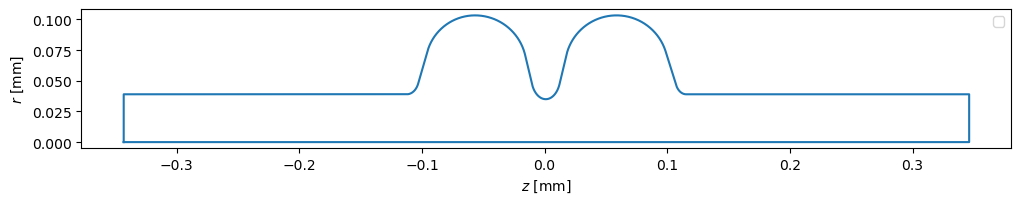

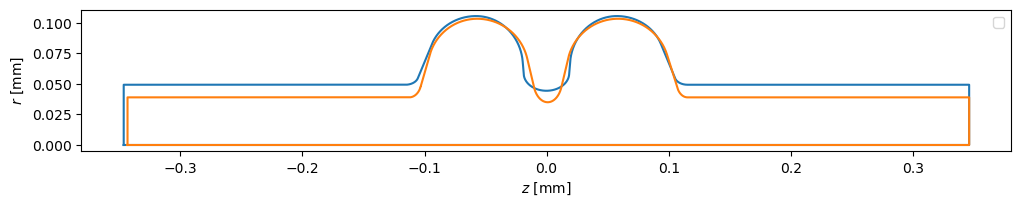

In [3]:
# define geometry parameters
midcell = np.array([42, 42, 12, 19, 35, 57.7, 100])
endcell_l = np.array([40.34, 40.34, 10, 13.5, 39, 55.716, 103.353])
endcell_r = np.array([42, 42, 9, 12.8, 39, 56.815, 103.353])
# create cavity
cav0 = Cavity(2, midcell, endcell_l, endcell_r, beampipe='both')
ax = cav0.plot('geometry')

C3795_1300MHz = shape_space['C3795_1300MHz']
TESLA = shape_space['TESLA']

# create cavity
cav = Cavity(2, np.array(C3795_1300MHz['IC']), np.array(C3795_1300MHz['OC']), np.array(C3795_1300MHz['OC_R']), beampipe='both')
ax = cav.plot('geometry')

# create cavity
cav1 = Cavity(2, TESLA['IC'], TESLA['OC'], TESLA['OC_R'], beampipe='both')
# show cavity
cav1.plot('geometry', ax)
plt.show()

In [4]:
cav1.inspect(variation=0.5)

Output()

In [2]:
with open(r'D:/Dropbox/CavityDesignHub/PhD_Thesis/Cavities/cavities.json') as f:
    shape_space = json.load(f)
# pp.pprint(shape_space)

In [3]:
# define flattop cavity cepc
cepc_shape = shape_space['CEPCv2']
pp.pprint(cepc_shape)

{   'BP': 'both',
    'CELL TYPE': 'flattop',
    'FREQ': 650,
    'IC': [93, 93, 20, 30, 75, 115.5, 205.979, 4, 0],
    'OC': [80, 80, 20, 30, 80, 109, 205.979, 4, 0],
    'OC_R': [80, 80, 20, 30, 80, 109, 205.979, 4, 0]}


In [4]:
cepc = Cavity(2, cepc_shape['IC'], cepc_shape['OC'], cepc_shape['OC_R'], beampipe=cepc_shape['BP'], cell_parameterisation=cepc_shape['CELL TYPE'])

In [8]:
cepc.inspect(variation=0.6)

Output()

In [5]:
cavs = Cavities()
cavs.save(project_folder='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


In [6]:
cavs.add_cavity(cepc, 'CEPCv2', 'CEPCv2')
# cavs.add_cavity(cav1, 'TESLA', 'TESLA')

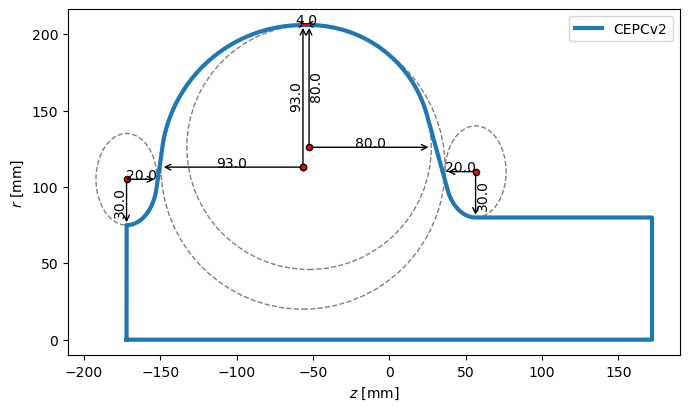

In [7]:
cavs.plot_cavities_contour_dimension(opt='end', figsize=(19, 4))

In [11]:
# cavs.run_eigenmode()

In [12]:
# cavs[0].plot_mesh()

In [13]:
# cavs[0].plot_fields()

In [14]:
cavs.eigenmode_qois

{}

In [15]:
uq_config = {
    'variables': ['A', 'a'],
    'delta': [0.01, 0.01],
    'objectives': ['Epk/Eacc []', 'Bpk/Eacc [mT/MV/m]', 'R/Q [Ohm]', 'G [Ohm]', 'Q []'],
    'cell_type': 'mid-cell',
    'method': 'stroud5',
    'processes': 1
}
eigenmode_config = {
    'rerun': False,
    'uq_config': uq_config
}

cavs.run_eigenmode(eigenmode_config)

In [16]:
cavs.uq_fm_results

{'CEPCv2': {'Epk/Eacc []': {'expe': [1.938670020920851],
   'stdDev': [0.00752866477822376]},
  'Bpk/Eacc [mT/MV/m]': {'expe': [4.100400491218878],
   'stdDev': [0.01705340458272378]},
  'R/Q [Ohm]': {'expe': [112.44488949675593], 'stdDev': [0.39908358616065076]},
  'G [Ohm]': {'expe': [267.34773350712123], 'stdDev': [0.47950966559103636]},
  'Q []': {'expe': [40964.1912423171], 'stdDev': [98.57325528352162]}},
 'TESLA': {'Epk/Eacc []': {'expe': [1.9890565087264438],
   'stdDev': [0.0053367368616574744]},
  'Bpk/Eacc [mT/MV/m]': {'expe': [4.165714172532782],
   'stdDev': [0.013788647071637614]},
  'R/Q [Ohm]': {'expe': [113.56018180158048], 'stdDev': [0.20163984077220648]},
  'G [Ohm]': {'expe': [265.238877504], 'stdDev': [0.4160060677716416]},
  'Q []': {'expe': [28582.43241764565], 'stdDev': [59.320638476113785]}}}

{'Epk/Eacc []': <Axes: label='Epk/Eacc []', ylabel='Epk/Eacc []'>,
 'Bpk/Eacc [mT/MV/m]': <Axes: label='Bpk/Eacc [mT/MV/m]', ylabel='Bpk/Eacc [mT/MV/m]'>,
 'R/Q [Ohm]': <Axes: label='R/Q [Ohm]', ylabel='R/Q [Ohm]'>,
 'G [Ohm]': <Axes: label='G [Ohm]', ylabel='G [Ohm]'>,
 'Q []': <Axes: label='Q []', ylabel='Q []'>}

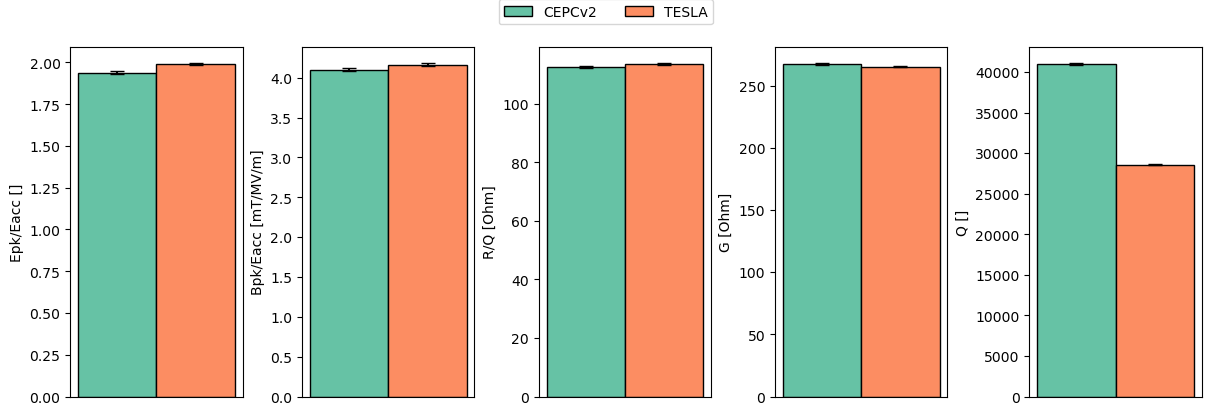

In [17]:
cavs.plot_compare_fm_bar(uq=True)

{'Epk/Eacc []': <Axes: label='Epk/Eacc []', ylabel='Epk/Eacc []'>,
 'Bpk/Eacc [mT/MV/m]': <Axes: label='Bpk/Eacc [mT/MV/m]', ylabel='Bpk/Eacc [mT/MV/m]'>,
 'R/Q [Ohm]': <Axes: label='R/Q [Ohm]', ylabel='R/Q [Ohm]'>,
 'G [Ohm]': <Axes: label='G [Ohm]', ylabel='G [Ohm]'>,
 'Q []': <Axes: label='Q []', ylabel='Q []'>}

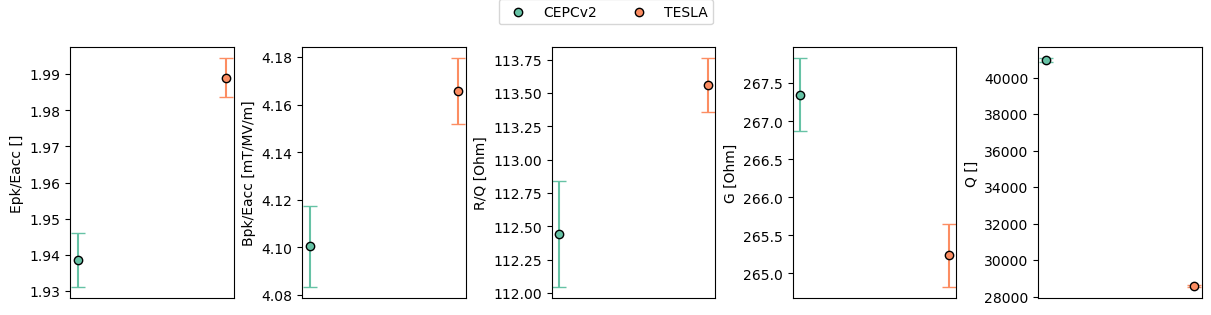

In [18]:
cavs.plot_compare_fm_scatter(uq=True)

In [21]:
op_points = {
            "Z": {
                "freq [MHz]": 400.79,  # Operating frequency
                "E [GeV]": 45.6,  # <- Beam energy
                "I0 [mA]": 1280,  # <- Beam current
                "V [GV]": 0.12,  # <- Total voltage
                "Eacc [MV/m]": 5.72,  # <- Accelerating field
                "nu_s []": 0.0370,  # <- Synchrotron oscillation tune
                "alpha_p [1e-5]": 2.85,  # <- Momentum compaction factor
                "tau_z [ms]": 354.91,  # <- Longitudinal damping time
                "tau_xy [ms]": 709.82,  # <- Transverse damping time
                "f_rev [kHz]": 3.07,  # <- Revolution frequency
                "beta_xy [m]": 56,  # <- Beta function
                "N_c []": 56,  # <- Number of cavities
                "T [K]": 4.5,  # <- Operating tempereature
                "sigma_SR [mm]": 4.32,  # <- Bunch length
                "sigma_BS [mm]": 15.2,  # <- Bunch length
                "Nb [1e11]": 2.76  # <- Bunch population
            }
}

wakefield_config = {
    'bunch_length': 25,
    'wakelength': 50,
    'processes': 2,
    'rerun': True,
    'operating_points': op_points,
    'uq_config': {
        'variables': ['A', 'B', 'a', 'b', 'Ri', 'L', 'Req'],
        'objectives': [["ZL", [1, 2, 5]], ["ZT", [2, 3, 4]], 'k_FM [V/pC]', '|k_loss| [V/pC]', '|k_kick| [V/pC/m]', 'P_HOM [kW]'],
        'delta': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
        'processes': 10,
        'method': ['Stroud3'],
        'cell_type': 'mid-cell',
        'cell complexity': 'simplecell',
        'operating_points': op_points
        }
}
cavs.run_wakefield(wakefield_config)
pp.pprint(cavs.wakefield_qois)

Oops! Something went wrong. Could not find the tune results. Please run tune again.
Oops! Something went wrong. Could not find the tune results. Please run tune again.
{   'CEPCv2': {   'Z_BS_15.2mm': {   'I0 [mA]': 1280.0,
                                     'Nb [1e11]': 2.76,
                                     'P_HOM [kW]': 11.592739787581278,
                                     'R/Q [Ohm]': 211.0570085679536,
                                     'k_FM [V/pC]': 0.20646483112034156,
                                     'n cell': 2,
                                     'sigma_z [mm]': 15.2,
                                     '|k_kick| [V/pC/m]': 2.247,
                                     '|k_loss| [V/pC]': 0.4113},
                  'Z_SR_4.32mm': {   'I0 [mA]': 1280.0,
                                     'Nb [1e11]': 2.76,
                                     'P_HOM [kW]': 32.71407107415047,
                                     'R/Q [Ohm]': 211.0570085679536,
                 

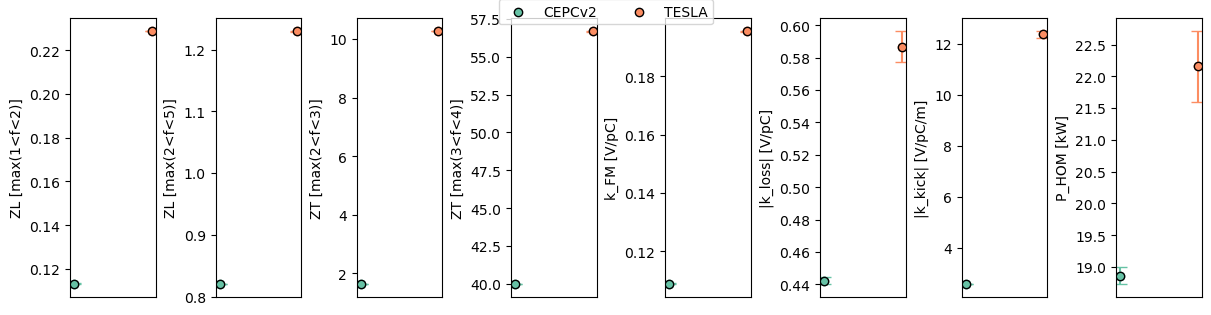

In [22]:
cavs.plot_compare_wakefield(opt='Z_SR_4.32mm', uq=True)